<h1 align=center><font size = 6> Coursera Capstone Project </font></h1>

<h2> The Battle of Neighborhoods (Week 2)</h2>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <p><font size=4>Contents</font></p>
     <ol>
         <li><a href="#w4_ans1">Introduction</a></li>
         <li><a href="#w4_ans2">Data</a></li>
         <li><a href="#w5_ans3">Methodology</a></li>
         <li><a href="#w5_ans4">Results</a></li>
         <li><a href="#w5_ans5">Discussion</a></li>
         <li><a href="#w5_ans6">Conclusion</a></li>
    </ol>
    
</div>

<a id="w4_ans1"></a>
<h3>Introduction</h3>

**Yangon** is the capital of Myanmar where local migrant workers are residing to work in various industries, and foreign investors are having their eye on new opportunities.

In [475]:
#library to convert an address to latitude and longitude values
from geopy.geocoders import Nominatim

# map rendering library
import folium 

#converting the address of Yangon City to geocodes 
address = 'Yangon City, MM'
geolocator = Nominatim(user_agent='mm_explorer')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude

#creating map
title_html = '''
    <h3 align="center" style="font-size:20px"><b>The Map of Yangon</b></h3>
    '''
map_yangon = folium.Map(location=[latitude, longitude], zoom_start=10)
map_yangon.get_root().html.add_child(folium.Element(title_html))

<img src='yangon_map.jpg'>

Recently, a local investor is looking for a place to run a burmese restaurant in a certain neighborhood of Yangon.
The area of interest will be in the following criteria:
<ol>
    <li>near to offices, hotels, and public attractions such as supermarket, shopping malls and cinemas</li>
    <li>fewer competitors in the vicinity</li>
    <li>ample space for parking</li> 
</ol>

<a id="w4_ans2"></a>
<h3>Data</h3>

To analyse the each neighborhoods, the coordinates of each neighborhoods in Yangon city will be required and can be found at the website, www.themimu.info.

In [476]:
#library to perform HTTP requests
import requests as rq

#library for handling Zip files
from zipfile import ZipFile as zf
from io import BytesIO as bi

#library to analyse the data
import pandas as pd

url = "http://themimu.info/sites/themimu.info/files/documents/Myanmar_PCodes_Release_9.3_Jan2021_Yangon.zip"
zipObj = rq.get(url)

#extract the Zip file
content = zf(bi(zipObj.content))

#we know that there is only one file
file = content.extract(content.namelist()[0])

Navigating to required data set.

In [477]:
#examine the available sheet names of extracted Excel file
print(pd.ExcelFile(file).sheet_names)

['01_SR', '02_District', '03_Township', '04_Town', '_05_Ward', '06-VillageTract', '_07_Village', 'Metadata']


In [478]:
#the sheet we need is '04_Town'
data = pd.read_excel(file, '04_Town')
data.head()

,SR_Pcode,SR_Name_Eng,District/SAZ_Pcode,District/SAZ_Name_Eng,Tsp_Pcode,Township_Name_Eng,Town_Pcode,Town_Name_Eng,Town_Name_MMR,Longitude,...,Source,Start_Date,Modified_End_Date,Notification,Notification_modified,GAD_Town_Status,Field_Town_Status,MIMU_Town_Mapping_Status,Change_Type,Remark
0,MMR013,Yangon,MMR013D004,Yangon (West),MMR013037,Ahlone,MMR013037701,Ahlone,အလုံ,96.127863,...,City Area,NaT,NaT,NaN,NaN,NaN,NaN,Active,NaN,GAD does not recognized as a Town
1,MMR013,Yangon,MMR013D004,Yangon (West),MMR013044,Bahan,MMR013044701,Bahan,ဗဟန်း,96.156112,...,City Area,NaT,NaT,NaN,NaN,NaN,NaN,Active,NaN,GAD does not recognized as a Town
2,MMR013,Yangon,MMR013D002,Yangon (East),MMR013017,Botahtaung,MMR013017701,Botahtaung,ဗိုလ်တထောင်,96.169709,...,City Area,NaT,NaT,NaN,NaN,NaN,NaN,Active,NaN,GAD does not recognized as a Town
3,MMR013,Yangon,MMR013D003,Yangon (South),MMR013032,Cocokyun,MMR013032701,Cocokyun Town,ကိုကိုးကျွန်း,93.368213,...,GAD,NaT,NaT,NaN,NaN,Active,NaN,Active,NaN,NaN
4,MMR013,Yangon,MMR013D004,Yangon (West),MMR013043,Dagon,MMR013043701,Dagon,ဒဂုံ,96.146900,...,City Area,NaT,NaT,NaN,NaN,NaN,NaN,Active,NaN,GAD does not recognized as a Town


The column names of the original data set will be changed to user friendly names as follows:

In [479]:
#required column names
column_names = ['District/SAZ_Name_Eng', 'Township_Name_Eng', 'Longitude', 'Latitude']

#new column names
new_column_names = ['Borough','Neighborhood','Longitude','Latitude']

data = data[column_names]
data.columns = new_column_names
data.dropna(subset=['Longitude'], inplace=True)
data = data.reset_index()
data.head()

,index,Borough,Neighborhood,Longitude,Latitude
0,0,Yangon (West),Ahlone,96.127863,16.782398
1,1,Yangon (West),Bahan,96.156112,16.815427
2,2,Yangon (East),Botahtaung,96.169709,16.771967
3,3,Yangon (South),Cocokyun,93.368213,14.134431
4,4,Yangon (West),Dagon,96.146900,16.794952


In [480]:
old_names = ['Kamaryut','Mingalartaungnyunt']
new_names = ['Kamayut','Mingala Taungnyunt']
indexes = []

for old, new in zip(old_names,new_names):
    data.iloc[data[data['Neighborhood']==old].index[0],2] = new
    indexes.append(data[data['Neighborhood']==new].index[0])

data.iloc[indexes,2]

17               Kamayut
31    Mingala Taungnyunt
Name: Neighborhood, dtype: object

In [481]:
#the shape of data
data = data.groupby(['Borough','Neighborhood']).head(1)
print('The data has {} rows and {} columns'.format(data.shape[0],data.shape[1]))

The data has 45 rows and 5 columns


With this data, we will be working to find the best place to run a burmese restaurant considering the criteria.

<a id="w5_ans3"></a>
<h3>Methodology</h3>

We will find the neighborhoods of Yangon where:

    1) low restaurants exists,
    2) populated with public areas, offices, hotels, supermarkets, cinemas, etc.,
    3) and population density is higher than average;

which will be:

    a) good for customer acquisition with less competition,
    b) and lower rental cost for spacious areas in return.

Firstly, for the requirements: population, neighborhood areas, we will need to **scrape from Wikipedia** and **explore venues using Foursquare API** based on coordinates of neighborhoods.

Secondly, as a exploratory analysis, we will find out **restaurant density, population density and existance of public and office areas** at every neighborhoods.

Finally, we will focus on areas with highest potential and highlight the selective areas for final decision on the map along with clusters of all neighborhoods using K-Means algorithm for further investigation at ground level.


<h4>1. Analysis</h4>

According to the data, there are 45 neighborhoods in the region.

In [482]:
townships = data['Neighborhood'].values
print('Total neighborhoods: {}'.format(len(townships)))
townships

Total neighborhoods: 45


array(['Ahlone', 'Bahan', 'Botahtaung', 'Cocokyun', 'Dagon',
       'Dagon Myothit (East)', 'Dagon Myothit (North)',
       'Dagon Myothit (Seikkan)', 'Dagon Myothit (South)', 'Dala',
       'Dawbon', 'Hlaing', 'Hlaingtharya', 'Hlegu', 'Hmawbi', 'Htantabin',
       'Insein', 'Kamayut', 'Kawhmu', 'Kayan', 'Kungyangon', 'Kyauktada',
       'Kyauktan', 'Kyeemyindaing', 'Lanmadaw', 'Latha', 'Mayangone',
       'Mingaladon', 'Mingala Taungnyunt', 'North Okkalapa', 'Pabedan',
       'Pazundaung', 'Sanchaung', 'Seikgyikanaungto', 'Seikkan',
       'Shwepyithar', 'South Okkalapa', 'Taikkyi', 'Tamwe', 'Thaketa',
       'Thanlyin', 'Thingangyun', 'Thongwa', 'Twantay', 'Yankin'],
      dtype=object)

Let's plot the locations on the map.

In [483]:
# getting coordinates of yangon
address = 'Yangon City, MM'

geolocator = Nominatim(user_agent="mm_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Yangon City are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Yangon City are 16.7967129, 96.1609916.


In [484]:
# create map of Yangon using latitude and longitude values
map_yangon = folium.Map(location=[latitude, longitude], zoom_start=10)

neighborhoods = data

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#000000',
        fill_opacity=1,
        parse_html=False).add_to(map_yangon)  
    
map_yangon

<img src='img/img1.jpg'>

First, we need to select a few areas that are popular for business location because of infrastructure availability and population with higher income.

In [485]:
# selective areas for potential locations
townships = ['Ahlone', 'Bahan', 'Botahtaung', 'Dagon', 'Hlaing', 'Insein', 'Kamayut', 'Kyauktada', 'Kyeemyindaing', 'Lanmadaw', 'Latha', 'Mayangone', 'Mingaladon', 'Mingala Taungnyunt', 'North Okkalapa', 'Pabedan', 'Pazundaung', 'Sanchaung', 'South Okkalapa', 'Tamwe', 'Thaketa', 'Thanlyin', 'Thingangyun', 'Yankin']

In [486]:
# create map of Yangon with selective neighborhoods
map_yangon = folium.Map(location=[latitude, longitude], zoom_start=10)

neighborhoods = data[data['Neighborhood'].isin(townships)]

# add markers to map
for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=3,
        popup=label,
        color='black',
        fill=True,
        fill_color='#000000',
        fill_opacity=1,
        parse_html=False).add_to(map_yangon)  
    
map_yangon

<img src='img/img2.jpg'>

Based on the filtered areas, required data such population and areas of neighborhoods will be scraped from www.wikipedia.org.

In [487]:
# loading necessary libraries for web scraping
import re
import numpy as np
import requests
from bs4 import BeautifulSoup

Let's define a function to scrape from Wikipedia.

In [488]:
def get_wiki_data(townships):
    wiki_table = pd.DataFrame(columns=['Neighborhood','Area','Population','Population Density'])
    print('=== Scrapping info of {} townships ==='.format(len(townships)))
    for i, township in zip(range(len(townships)),townships):
        print('          Index {}/{}: {}'.format(i,len(townships)-1,township))
        wiki_url = 'https://en.wikipedia.org/wiki/{}_Township'.format(township)
        wiki_data = requests.get(wiki_url).text
        soup = BeautifulSoup(wiki_data,'html5lib')
        tables = soup.find('table')
        cnt = 0
        tsp=[]    
        area=[]
        population=[]
        pop_density =[]
        
        for row in tables.find_all('tr'):
            if (row.find('th',text=re.compile('.*Township'))):
                    tsp = row.find('td').text
            else:
                    tsp = township
        for row in tables.find_all('tr'):
            if (row.find('th',text=re.compile('.*Total'))):
                    if cnt == 0:
                        area = row.find('td').text
                    else:
                        population = row.find('td').text
                    cnt += 1

        for row in tables.find_all('tr'):
            if (row.find('th',text=re.compile('.*Density'))):
                    pop_density = row.find('td').text

        wiki_table = wiki_table.append({'Neighborhood':tsp,'Area':area,'Population':population,'Population Density':pop_density}, ignore_index=True)
    return wiki_table

With the function, store the data to variable "wiki_table".

In [489]:
wiki_table = get_wiki_data(townships)

=== Scrapping info of 24 townships ===
          Index 0/23: Ahlone
          Index 1/23: Bahan
          Index 2/23: Botahtaung
          Index 3/23: Dagon
          Index 4/23: Hlaing
          Index 5/23: Insein
          Index 6/23: Kamayut
          Index 7/23: Kyauktada
          Index 8/23: Kyeemyindaing
          Index 9/23: Lanmadaw
          Index 10/23: Latha
          Index 11/23: Mayangone
          Index 12/23: Mingaladon
          Index 13/23: Mingala Taungnyunt
          Index 14/23: North Okkalapa
          Index 15/23: Pabedan
          Index 16/23: Pazundaung
          Index 17/23: Sanchaung
          Index 18/23: South Okkalapa
          Index 19/23: Tamwe
          Index 20/23: Thaketa
          Index 21/23: Thanlyin
          Index 22/23: Thingangyun
          Index 23/23: Yankin


In [490]:
# copy the data for reproducibility
df_appended = wiki_table.copy()
df_appended.head()

,Neighborhood,Area,Population,Population Density
0,Ahlone,4 km2 (1.4 sq mi),"41,200","11,000/km2 (29,000/sq mi)"
1,Bahan,8.84 km2 (3.413 sq mi),"81,000","9,200/km2 (24,000/sq mi)"
2,Botahtaung,2.4 km2 (0.92 sq mi),"42,000","18,000/km2 (46,000/sq mi)"
3,Dagon,4.7 km2 (1.8 sq mi),"25,082","5,300/km2 (14,000/sq mi)"
4,Hlaing,13.7 km2 (5.29 sq mi),"125,000","9,100/km2 (24,000/sq mi)"


The data contains the required data but in formatted text, so, we will clean texts and characters from the data first.

In [491]:
# cleaning to have desired format

df_appended['Population']=df_appended['Population'].str.replace(',','').fillna('').astype('int')
df_appended['Area_sqkm']=df_appended['Area'].str.split('(', expand=True)[0].str.replace('km2','').fillna('').astype('float')
df_appended['Area_sqm']=df_appended['Area_sqkm']*1000000
df_appended['Radius_m'] = np.sqrt(df_appended['Area_sqm']).astype('int')
df_appended['Population_density_per_sqkm']=df_appended['Population Density'].str.split('(', expand=True)[0]
df_appended['Population_density_per_sqkm']=df_appended['Population_density_per_sqkm'].str.replace('/km2','').fillna('').str.replace(',','').fillna('').astype('int')
new_data_columns = ['Neighborhood','Population','Area_sqkm','Radius_m','Population_density_per_sqkm']
new_data =df_appended[new_data_columns].copy()
new_data.head()

,Neighborhood,Population,Area_sqkm,Radius_m,Population_density_per_sqkm
0,Ahlone,41200,4.00,2000,11000
1,Bahan,81000,8.84,2973,9200
2,Botahtaung,42000,2.40,1549,18000
3,Dagon,25082,4.70,2167,5300
4,Hlaing,125000,13.70,3701,9100


We will join to existing data with additional features derived from Wikipedia, and store as **new_data**.

In [492]:
new_data = pd.merge(data,new_data, how = 'inner', left_on = 'Neighborhood',right_on = "Neighborhood").drop('index', axis=1)
new_data.head()

,Borough,Neighborhood,Longitude,Latitude,Population,Area_sqkm,Radius_m,Population_density_per_sqkm
0,Yangon (West),Ahlone,96.127863,16.782398,41200,4.00,2000,11000
1,Yangon (West),Bahan,96.156112,16.815427,81000,8.84,2973,9200
2,Yangon (East),Botahtaung,96.169709,16.771967,42000,2.40,1549,18000
3,Yangon (West),Dagon,96.146900,16.794952,25082,4.70,2167,5300
4,Yangon (West),Hlaing,96.125227,16.847934,125000,13.70,3701,9100


Using the new_data, we will explore the venues of each townships by Foursquare.

In [493]:
# loading libraries required
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

In [494]:
# setting up credentials for venue exploring
import os
from dotenv import load_dotenv
load_dotenv()

CLIENT_ID = os.getenv('CLIENT_ID')
CLIENT_SECRET = os.getenv('CLIENT_SECRET')
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # foursquare maximum explore limit

Let's define a function to get nearby venues upon provided coordinates.

In [495]:
def getNearbyVenues(names, latitudes, longitudes, radius):
    print('=== Getting Nearby Venues ===')
    venues_list=[]
    cnt = 1
    for name, lat, lng, rds in zip(names, latitudes, longitudes, radius):
        print('          {}/{}: {}'.format(cnt, len(names), name))
        cnt += 1
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            rds, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Using the function, we will store venues of selective neighborhoods to **yangon_venues**.

In [496]:
nms = new_data['Neighborhood']
lats = new_data['Latitude']
lngs = new_data['Longitude']
rds = new_data['Radius_m']
yangon_venues = getNearbyVenues(nms,lats,lngs,rds)

=== Getting Nearby Venues ===
          1/24: Ahlone
          2/24: Bahan
          3/24: Botahtaung
          4/24: Dagon
          5/24: Hlaing
          6/24: Insein
          7/24: Kamayut
          8/24: Kyauktada
          9/24: Kyeemyindaing
          10/24: Lanmadaw
          11/24: Latha
          12/24: Mayangone
          13/24: Mingaladon
          14/24: Mingala Taungnyunt
          15/24: North Okkalapa
          16/24: Pabedan
          17/24: Pazundaung
          18/24: Sanchaung
          19/24: South Okkalapa
          20/24: Tamwe
          21/24: Thaketa
          22/24: Thanlyin
          23/24: Thingangyun
          24/24: Yankin


Let's check the size of the data and format.

In [499]:
print(yangon_venues.shape)
yangon_venues.head()

(1551, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Ahlone,16.782398,96.127863,Kou Fu Restaurant,16.787631,96.133878,Chinese Restaurant
1,Ahlone,16.782398,96.127863,Belmond Governor's Residence,16.788131,96.139003,Hotel
2,Ahlone,16.782398,96.127863,Shan Yoe Yar Fine Dining Restaurant,16.780792,96.139372,Burmese Restaurant
3,Ahlone,16.782398,96.127863,Lucky Seven Tea Shop,16.783131,96.133287,Café
4,Ahlone,16.782398,96.127863,Mahlzeit,16.797777,96.130063,German Restaurant


Let's see the venues count by neighborhood.

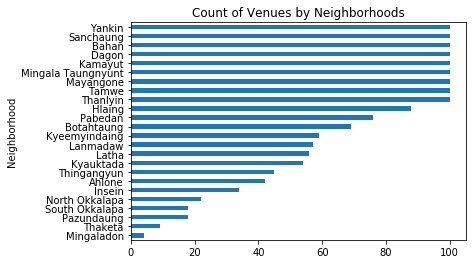

In [513]:
yangon_venues.groupby('Neighborhood').size().sort_values( ascending=True).plot.barh()
plt.title('Count of Venues by Neighborhoods')
plt.show()

We can see clearly that top 9 neighborhoods end up with 100 venues because of limit in Foursquare API.

In [516]:
# neighborhoods with limited venues
venue_counts = yangon_venues.groupby('Neighborhood').count()
neigh_to_adjust = venue_counts[venue_counts['Venue']==100]
print('Total neighborhoods with limited venues: {}'.format(neigh_to_adjust.shape[0]))
neigh_to_adjust.head()

Total neighborhoods with limited venues: 9


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Bahan,100,100,100,100,100,100
Dagon,100,100,100,100,100,100
Kamayut,100,100,100,100,100,100
Mayangone,100,100,100,100,100,100
Mingala Taungnyunt,100,100,100,100,100,100


Let's create a table of those 9 neighorhoods with offseted coordinates in 4 areas of each neighborhoods. We will need to explore the venues with related radius of each neighborhoods since the areas of those are not the same as in below figure.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6B3207648>,
      dtype=object)

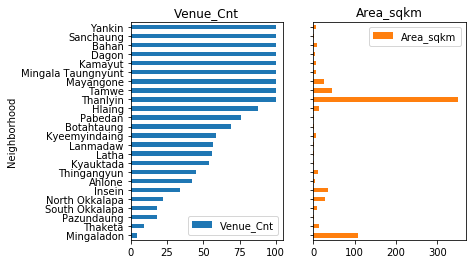

In [534]:
#plotting comparison

yangon_venues.groupby('Neighborhood').size().to_frame()\
       .rename(columns={0:'Venue_Cnt'})\
.merge(new_data[['Neighborhood','Area_sqkm']],\
       how='inner', left_on='Neighborhood', right_on='Neighborhood')\
.set_index('Neighborhood')\
.sort_values('Venue_Cnt', ascending=True)\
.plot(kind='barh',subplots=True, sharey=True, sharex=False, layout=(1,2))

In [535]:
# neighborhoods to adjust with venue exploration

neigh_to_adj_names = neigh_to_adjust.index.values.tolist()
neigh_to_adj = new_data[new_data['Neighborhood'].isin(neigh_to_adj_names)]

Let's define a function to offset the coordinates.

In [537]:
#function to offset each coordinates of each neighborhoods into 4 sub-areas 
#accroding to their area

def offset_LatLng(neighs, lats, lngs, rds):
    offset_list = []
    for neigh, lat, lng, rd in zip(neighs, lats, lngs, rds):
            offset_list.append([
            neigh,
            lng + float(rd) / 2 / 111111 * np.cos(lat),
            lat + float(rd) / 2 / 111111,
            int(rd / 2)])
            
            offset_list.append([
            neigh,
            lng + float(rd) / 2 / 111111 * np.cos(lat),
            lat - float(rd) / 2 / 111111,
            int(rd / 2)])
            
            offset_list.append([
            neigh,
            lng - float(rd) / 2 / 111111 * np.cos(lat),
            lat - float(rd) / 2 / 111111,
            int(rd / 2)])
            
            offset_list.append([
            neigh,
            lng - float(rd) / 2 / 111111 * np.cos(lat),
            lat + float(rd) / 2 / 111111,
            int(rd / 2)])
            
            
    adjusted_coordinates = pd.DataFrame([lst for lst in offset_list])
    adjusted_coordinates.columns = ['Neighborhood', 'Longitude','Latitude','Radius_m']
    return adjusted_coordinates

Below is the sample of offset coordinates with updated radius for exploration.

In [538]:
new_data_adj = offset_LatLng(neigh_to_adj['Neighborhood'],neigh_to_adj['Latitude'],neigh_to_adj['Longitude'],neigh_to_adj['Radius_m'])
new_data_adj.head()

,Neighborhood,Longitude,Latitude,Radius_m
0,Bahan,96.150133,16.828806,1486
1,Bahan,96.150133,16.802048,1486
2,Bahan,96.162091,16.802048,1486
3,Bahan,96.162091,16.828806,1486
4,Dagon,96.142364,16.804704,1083


Let's explore again with those coordinates and save to **yangon_venue_adj**.

In [539]:
nms = new_data_adj['Neighborhood']
lats = new_data_adj['Latitude']
lngs = new_data_adj['Longitude']
rds = new_data_adj['Radius_m']
yangon_venues_adj = getNearbyVenues(nms,lats,lngs,rds)

=== Getting Nearby Venues ===
          1/36: Bahan
          2/36: Bahan
          3/36: Bahan
          4/36: Bahan
          5/36: Dagon
          6/36: Dagon
          7/36: Dagon
          8/36: Dagon
          9/36: Kamayut
          10/36: Kamayut
          11/36: Kamayut
          12/36: Kamayut
          13/36: Mayangone
          14/36: Mayangone
          15/36: Mayangone
          16/36: Mayangone
          17/36: Mingala Taungnyunt
          18/36: Mingala Taungnyunt
          19/36: Mingala Taungnyunt
          20/36: Mingala Taungnyunt
          21/36: Sanchaung
          22/36: Sanchaung
          23/36: Sanchaung
          24/36: Sanchaung
          25/36: Tamwe
          26/36: Tamwe
          27/36: Tamwe
          28/36: Tamwe
          29/36: Thanlyin
          30/36: Thanlyin
          31/36: Thanlyin
          32/36: Thanlyin
          33/36: Yankin
          34/36: Yankin
          35/36: Yankin
          36/36: Yankin


Below is the data frame with updated venues.

In [540]:
print(yangon_venues_adj.shape)
yangon_venues_adj.head()

(1774, 7)


,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Bahan,16.828806,96.150133,Le Planteur,16.826547,96.147652,French Restaurant
1,Bahan,16.828806,96.150133,Meliá Yangon,16.826573,96.154913,Hotel
2,Bahan,16.828806,96.150133,Sedona Hotel,16.829299,96.155425,Hotel
3,Bahan,16.828806,96.150133,The Market,16.826890,96.154479,Buffet
4,Bahan,16.828806,96.150133,Sabai at DMZ,16.830945,96.151925,Thai Restaurant


Adding actual coordinates back to the data frame.

In [541]:
yangon_venues_adj.drop(['Neighborhood Longitude','Neighborhood Latitude'], axis=1, inplace=True)
yangon_venues_adj = pd.merge(yangon_venues_adj,data, how='left', left_on='Neighborhood', right_on='Neighborhood')

Renaming the columns to keep as the same as original data.

In [542]:
yangon_venues_adj.rename(columns={'Longitude':'Neighborhood Longitude', 'Latitude':'Neighborhood Latitude'}, inplace=True)
yangon_venues_adj.drop(['index','Borough'],axis=1, inplace=True)

Reordering the columns.

In [543]:
fixed_columns = [yangon_venues_adj.columns[0]]+[yangon_venues_adj.columns[5]]+[yangon_venues_adj.columns[6]] + list(yangon_venues_adj.columns[1:-2])
yangon_venues_adj = yangon_venues_adj[fixed_columns]

Merging the data back to **yangon_venues**.

In [545]:
yangon_venues.drop(yangon_venues[yangon_venues['Neighborhood'].isin(neigh_to_adj_names)].index,axis=0, inplace=True)
yangon_venues = yangon_venues.append(yangon_venues_adj)
yangon_venues.shape

(2425, 7)

Now, we can see the venues are more realistic.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6B4B2E688>,
      dtype=object)

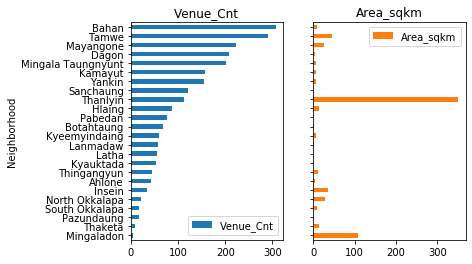

In [547]:
#plotting comparison

yangon_venues.groupby('Neighborhood').size().to_frame()\
       .rename(columns={0:'Venue_Cnt'})\
.merge(new_data[['Neighborhood','Area_sqkm']],\
       how='inner', left_on='Neighborhood', right_on='Neighborhood')\
.set_index('Neighborhood')\
.sort_values('Venue_Cnt', ascending=True)\
.plot(kind='barh',subplots=True, sharey=True, sharex=False, layout=(1,2))

In [548]:
neigh_venu = yangon_venues.groupby('Neighborhood').count()[['Venue']]
neigh_info = new_data[['Neighborhood','Population','Area_sqkm','Population_density_per_sqkm']]
neigh_info.rename(columns={'Population_density_per_sqkm':'Population Density', 'Area_sqkm':'Area Sq.Km'}, inplace=True)

C:\Users\ThinkPad\anaconda3\lib\site-packages\pandas\core\frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


With the availables features to explore, we can quickly see in the below figures that venues are populated in some neighborhoods **regardless of population, area and population density**.

This is because those areas are populated with peoples in high income or include retails & wholesales supermarkets and shopping malls.

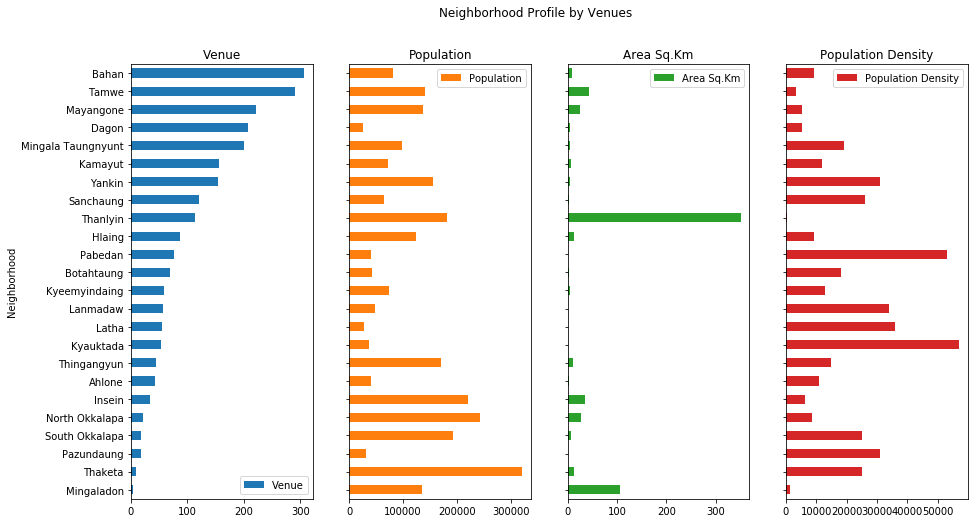

In [551]:
fig_df = pd.merge(neigh_venu,neigh_info,\
                  how='inner',left_on='Neighborhood',right_on='Neighborhood')
fig_df.index=fig_df['Neighborhood']
axes = fig_df.sort_values(by=['Venue'],\
                          ascending=True).plot(kind='barh',\
                                                            figsize=(15,8), \
                                               subplots=True, \
                                               layout=(1,4), \
                                               sharex=False, \
                                               sharey=True, \
                                               title='Neighborhood Profile by Venues')

Let's prepare data for K-Means clustering in order to find out how the neighborhoods are similar to each other.

In [552]:
# one hot encoding to convert categorical values to binary
yangon_onehot = pd.get_dummies(yangon_venues[['Venue Category']], prefix='', prefix_sep='')

# remove Neighborhood category value which is similar to Neighborhood name
yangon_onehot.drop('Neighborhood',axis=1,inplace=True)

# add Neighborhood column back
yangon_onehot['Neighborhood'] = yangon_venues['Neighborhood']

# move Neighborhood column to be first
fixed_columns = [yangon_onehot.columns[-1]]+list(yangon_onehot.columns[:-1])
yangon_onehot = yangon_onehot[fixed_columns]

yangon_onehot.head()

,Neighborhood,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Arcade,Art Museum,Asian Restaurant,...,Sushi Restaurant,Szechuan Restaurant,Tea Room,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Video Store,Warehouse Store,Whisky Bar,Zoo
0,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Ahlone,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


We can see in the above table that there are 139 venues (features) in total representing the whole region.

But, we will not require those detail venues to identify the poetntial area and we will group into the categories that we need for considering as potential.

In [553]:
# adding Main Category column grouping similar areas
venues =yangon_venues[['Venue Category']]
venues['Main Category'] = np.where(venues['Venue Category'].str.contains('Restaurant'),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains('BBQ'),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('cafe', re.IGNORECASE)), 'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('café', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains('Breakfast'),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains('Hotel'),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains('Supermarket'),'Shopping Mall',\
                                np.where(venues['Venue Category'].str.contains('Karaoke'),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains('Bar'),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains('Bakery'),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains('Shopping'),'Shopping Mall',\
                                np.where(venues['Venue Category'].str.contains('Joint'),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains('Multiplex'),'Shopping Mall',\
                                np.where(venues['Venue Category'].str.contains('Hostel'),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('store', re.IGNORECASE)),'Store',\
                                np.where(venues['Venue Category'].str.contains('Food'),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains('Tea'),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains('Gift'),'Store',\
                                np.where(venues['Venue Category'].str.contains('Ice Cream'),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*cake', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*noodle', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*gym', re.IGNORECASE)),'Fitness Center',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*park', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*lounge', re.IGNORECASE)),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('motel', re.IGNORECASE)),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*ship', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*boat', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('^pub$', re.IGNORECASE)),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*pizza', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('lake', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*golf', re.IGNORECASE)),'Sport Center',\
                                np.where(venues['Venue Category'].str.contains(re.compile('garden', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*outdoor', re.IGNORECASE)),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains(re.compile('coffee', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*entertainment', re.IGNORECASE)),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains(re.compile('art', re.IGNORECASE)),'Store',\
                                np.where(venues['Venue Category'].str.contains(re.compile('.*airport', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('soccer', re.IGNORECASE)),'Sport Center',\
                                np.where(venues['Venue Category'].str.contains(re.compile('dessert', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('train', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('market', re.IGNORECASE)),'Market',\
                                np.where(venues['Venue Category'].str.contains(re.compile('sport', re.IGNORECASE)),'Sport Center',\
                                np.where(venues['Venue Category'].str.contains(re.compile('spa', re.IGNORECASE)),'Clinic',\
                                np.where(venues['Venue Category'].str.contains(re.compile('bodega', re.IGNORECASE)),'Store',\
                                np.where(venues['Venue Category'].str.contains(re.compile('buffet', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('steak', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('night club', re.IGNORECASE)),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains(re.compile('nightclub', re.IGNORECASE)),'Entertainment',\
                                np.where(venues['Venue Category'].str.contains(re.compile('harbor', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('bus', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('donut', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('bistro', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('snack', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('movie', re.IGNORECASE)),'Cinema',\
                                np.where(venues['Venue Category'].str.contains(re.compile('soup', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('urrito', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('construction', re.IGNORECASE)),'Office',\
                                np.where(venues['Venue Category'].str.contains(re.compile('flower', re.IGNORECASE)),'Store',\
                                np.where(venues['Venue Category'].str.contains(re.compile('boarding', re.IGNORECASE)),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('salad', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('Sandwich', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('diner', re.IGNORECASE)),'Restaurant',\
                                np.where(venues['Venue Category'].str.contains(re.compile('museum', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('massage', re.IGNORECASE)),'Clinic',\
                                np.where(venues['Venue Category'].str.contains(re.compile('zoo', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('rail', re.IGNORECASE)),'Transportation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('stadium', re.IGNORECASE)),'Public Space',\
                                np.where(venues['Venue Category'].str.contains(re.compile('living', re.IGNORECASE)),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('government', re.IGNORECASE)),'Office',\
                                np.where(venues['Venue Category'].str.contains(re.compile('bagel', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('boutique', re.IGNORECASE)),'Store',\
                                np.where(venues['Venue Category'].str.contains(re.compile('yogurt', re.IGNORECASE)),'Coffee Shop',\
                                np.where(venues['Venue Category'].str.contains(re.compile('playground', re.IGNORECASE)),'Sport Center',\
                                np.where(venues['Venue Category'].str.contains(re.compile('resort', re.IGNORECASE)),'Accommodation',\
                                np.where(venues['Venue Category'].str.contains(re.compile('bowling', re.IGNORECASE)),'Sport Center'\
                                 ,'General')))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))))

venues.drop_duplicates(inplace=True)

C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:78: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
C:\Users\ThinkPad\anaconda3\lib\site-packages\ipykernel_launcher.py:80: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [554]:
yangon_venues = pd.merge(yangon_venues,venues,how='inner',\
                         left_on='Venue Category', \
                         right_on='Venue Category')

Surprisingly, in the figure below, majority of restaurants are located in areas with high population but with low density. Which means, our assumption for having "ample space" is a good measurement.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6B5F49688>,
      dtype=object)

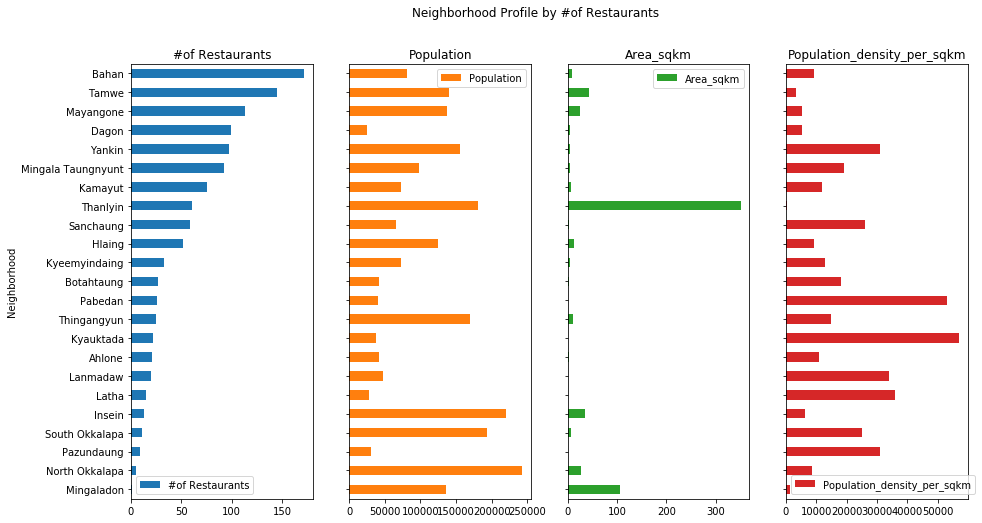

In [587]:
yangon_venues[yangon_venues['Main Category'].isin(['Restaurant'])]\
[['Neighborhood','Main Category']].groupby('Neighborhood').size()\
.to_frame().rename(columns={0:'#of Restaurants'})\
.merge(new_data, how='left', left_index=True, right_on='Neighborhood')\
.set_index('Neighborhood')[['#of Restaurants','Population','Area_sqkm',\
                            'Population_density_per_sqkm']].sort_values('#of Restaurants',\
                                                                        ascending=True)\
.plot(kind='barh',figsize=(15,8),subplots=True, layout=(1,4), sharex=False, \
      sharey=True, title='Neighborhood Profile by #of Restaurants')


Let's review this comparison by sorting **Area_sqkm** to confirm our assumption again.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000002D6B6507288>,
      dtype=object)

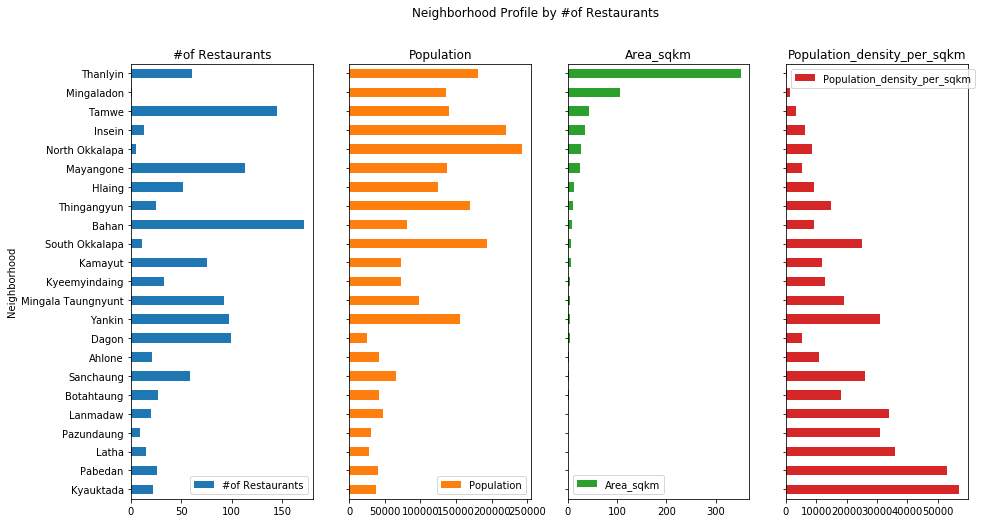

In [588]:
yangon_venues[yangon_venues['Main Category'].isin(['Restaurant'])]\
[['Neighborhood','Main Category']].groupby('Neighborhood').size()\
.to_frame().rename(columns={0:'#of Restaurants'})\
.merge(new_data, how='left', left_index=True, right_on='Neighborhood')\
.set_index('Neighborhood')[['#of Restaurants','Population','Area_sqkm',\
                            'Population_density_per_sqkm']].sort_values('Area_sqkm',\
                                                                        ascending=True)\
.plot(kind='barh',figsize=(15,8),subplots=True, layout=(1,4), sharex=False, \
      sharey=True, title='Neighborhood Profile by #of Restaurants')


Accroding to above comparison, top 3 neighborhoods populated with restaurants have corelation to big areas with low population density while the existance of offices and income of the population are considered as top reasons.

With that details, we can estimate, the second neighborhood **Mingaladon** is the best option following **Insein** and **North Okkalapa**. 

Let's focus on those 3 areas and plot them on to clusters of neighborhoods usings K-Means algorithm below.

In [589]:
# prepare data table for K-Means clustering
yangon_onehot = pd.get_dummies(yangon_venues['Main Category'], prefix='', prefix_sep='')
yangon_onehot['Neighborhood']=yangon_venues['Neighborhood']
fixed_columns = [yangon_onehot.columns.values[-1]]+list(yangon_onehot.columns.values[0:-1])
yangon_grouped = yangon_onehot[fixed_columns].groupby('Neighborhood').mean().reset_index()
yangon_grouped.head()

,Neighborhood,Accommodation,Cinema,Clinic,Coffee Shop,Entertainment,Fitness Center,General,Market,Office,Public Space,Restaurant,Shopping Mall,Sport Center,Store,Transportation
0,Ahlone,0.119048,0.000000,0.000000,0.166667,0.119048,0.000000,0.000000,0.000000,0.000000,0.000000,0.500000,0.071429,0.000000,0.023810,0.000000
1,Bahan,0.078176,0.000000,0.026059,0.127036,0.058632,0.009772,0.013029,0.009772,0.003257,0.045603,0.560261,0.032573,0.003257,0.032573,0.000000
2,Botahtaung,0.188406,0.000000,0.000000,0.101449,0.144928,0.014493,0.000000,0.000000,0.000000,0.014493,0.391304,0.072464,0.000000,0.043478,0.028986
3,Dagon,0.144928,0.009662,0.028986,0.173913,0.048309,0.004831,0.004831,0.009662,0.000000,0.024155,0.478261,0.053140,0.000000,0.019324,0.000000
4,Hlaing,0.068182,0.000000,0.011364,0.125000,0.022727,0.022727,0.000000,0.000000,0.000000,0.034091,0.590909,0.079545,0.034091,0.011364,0.000000


In [590]:
#define function to order the main categories accroding to occurance of them

def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

Let's create data frame of neighborhood along with common venues in order.

In [591]:
# limit top venues
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = yangon_grouped['Neighborhood']

for ind in np.arange(yangon_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(yangon_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Ahlone,Restaurant,Coffee Shop,Entertainment,Accommodation,Shopping Mall,Store,Transportation,Sport Center,Public Space,Office
1,Bahan,Restaurant,Coffee Shop,Accommodation,Entertainment,Public Space,Store,Shopping Mall,Clinic,General,Market
2,Botahtaung,Restaurant,Accommodation,Entertainment,Coffee Shop,Shopping Mall,Store,Transportation,Public Space,Fitness Center,Sport Center
3,Dagon,Restaurant,Coffee Shop,Accommodation,Shopping Mall,Entertainment,Clinic,Public Space,Store,Market,Cinema
4,Hlaing,Restaurant,Coffee Shop,Shopping Mall,Accommodation,Sport Center,Public Space,Fitness Center,Entertainment,Store,Clinic


With that, we will run K-Means to create clusters.

In [592]:
# set number of clusters
kclusters = 5

yangon_grouped_clustering = yangon_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(yangon_grouped_clustering)

# check cluster labels generated for each row in the dataframe

kmeans.labels_[0:10] 

array([3, 3, 1, 3, 3, 4, 3, 1, 3, 1])

Let's create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.

In [593]:
# add clustering labels
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

yangon_merged = new_data

# merge yangon_grouped with new_data to add latitude/longitude for each neighborhood
yangon_merged = yangon_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

yangon_merged.head()

,Borough,Neighborhood,Longitude,Latitude,Population,Area_sqkm,Radius_m,Population_density_per_sqkm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Yangon (West),Ahlone,96.127863,16.782398,41200,4.00,2000,11000,3,Restaurant,Coffee Shop,Entertainment,Accommodation,Shopping Mall,Store,Transportation,Sport Center,Public Space,Office
1,Yangon (West),Bahan,96.156112,16.815427,81000,8.84,2973,9200,3,Restaurant,Coffee Shop,Accommodation,Entertainment,Public Space,Store,Shopping Mall,Clinic,General,Market
2,Yangon (East),Botahtaung,96.169709,16.771967,42000,2.40,1549,18000,1,Restaurant,Accommodation,Entertainment,Coffee Shop,Shopping Mall,Store,Transportation,Public Space,Fitness Center,Sport Center
3,Yangon (West),Dagon,96.146900,16.794952,25082,4.70,2167,5300,3,Restaurant,Coffee Shop,Accommodation,Shopping Mall,Entertainment,Clinic,Public Space,Store,Market,Cinema
4,Yangon (West),Hlaing,96.125227,16.847934,125000,13.70,3701,9100,3,Restaurant,Coffee Shop,Shopping Mall,Accommodation,Sport Center,Public Space,Fitness Center,Entertainment,Store,Clinic


Let's see how the clusters are formed on the map.

In [596]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=12)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(yangon_merged['Latitude'], yangon_merged['Longitude'], yangon_merged['Neighborhood'], yangon_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=9,
        popup=label,
        color='grey',#rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=1).add_to(map_clusters)
    
temp = new_data[new_data['Neighborhood'].isin(['Mingaladon','Insein','North Okkalapa'])]
for i in range(len(temp)):
    folium.Marker(
        location=[temp.iloc[i]['Latitude'], temp.iloc[i]['Longitude']],
        popup=data.iloc[i]['Neighborhood']).add_to(map_clusters)
       
map_clusters

<img src='img/img9.jpg'>

Obviously, the 3 areas are located away from the downtown area but have potentials too.

Let's look at the info of those below.

In [336]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 0, yangon_merged.columns[[1] + list(range(5, yangon_merged.shape[1]))]]

,Neighborhood,Area_sqkm,Radius_m,Population_density_per_sqkm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
12,Mingaladon,106.6,10324,1300,0,Restaurant,Public Space,Market,General,Transportation,Store,Sport Center,Shopping Mall,Office,Fitness Center


In [597]:
yangon_merged.loc[yangon_merged['Cluster Labels'] == 4, yangon_merged.columns[[1] + list(range(5, yangon_merged.shape[1]))]]

,Neighborhood,Area_sqkm,Radius_m,Population_density_per_sqkm,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
5,Insein,35.0,5916,6300,4,Restaurant,Transportation,Coffee Shop,Shopping Mall,Store,Accommodation,Sport Center,Public Space,Market,Office
14,North Okkalapa,28.3,5319,8600,4,Transportation,Restaurant,Coffee Shop,Accommodation,Store,Sport Center,Shopping Mall,Public Space,Office,Market


<a id="w5_ans4"></a>
<h3>Results</h3>

As we can see, both of the clusters where our top 3 prioritized areas have top popular venues in **Transportation**, **Public Space** and **Market**.

The existance of the competitors are also low and the areas have lesser population density comparing to other parts of the region which is the opportunity for acquiring new customers and the location with ample space at lower cost.

Besides, the areas are located near to the exist ways of Yangon; Pyay road and international airport of Yangon, to other parts of Myanmar and foreign countries. That will be an advangeous for attracting travellers in the holiday seasons as well.

So, we recommend to keep our priority in finding the location in those areas.

<a id="w5_ans5"></a>
<h3>Discussion</h3>

We have explored the venues and examined the features to oversee the potential areas. But there are still limitations that:

1) exploring nearby venues from the center of neighborhood can not get venues within the area correctly since neighborhood boundaries are not in circular shape

2) venues obtained from Foursquare is limited and may not include new venues that are not registered on the web

But, with this solid information, we can start exploring at the ground level for futher project development works.

<a id="w5_ans6"></a>
<h3>Conclusion</h3>

Eventhough the recommendation is for kicking off the project, we can improve our report on giving more time on:

1) using **SVM** that enables explored venues to be clustered into neighborhoods with better accuracy,

2) improving K-Means by finding best cluster size with **elbow method**

As a result, the recommendation will be more reliable